# Feature Engineering

모델의 성능을 높이기 위해 feature를 제거하거나 추출, 합하는 과정이 필요하다. 이런 과정을 feature engineering이라고 한다.

### Age_band

Age는 연속적인 데이터이다. 데이터 분석적인 측면에서 봤을 때 연속적인 데이터는 처리가 힘들다.

(ex. 30명의 사람이 있다면 최소 15~20개의 Age value가 존재한다. 이들을 모두 따로 처리하는 것은 비효율적)

그러므로 이런 연속적인 값을 카테고리 기준으로 분류한다. (Binning, Normalisation)

이번 데이터에서는 80까지의 데이터가 있기 때문에 0~80까지 5 bins로 나누겠다. bins의 사이즈는 16

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data = pd.read_csv('C:/Users/jlee0/Desktop/KYU/deep learning/kaggle/Titanic/data/train.csv')

In [3]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')  #([A-Za-z]+)\. : A~Z와 a~z사이의 문자를 뽑고 .로 마무리되는 문자열을 추춘하는 것이다. Mr. Mrs.를 뽑기에 좋음

In [4]:
data.loc[(data.Age.isnull())&(data.Initial == 'Mr'),'Age'] = 33  #Age값은 null이면서 Initial은 Mr인 부분의 Age에 33을 대입
data.loc[(data.Age.isnull())&(data.Initial == 'Mrs'),'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial == 'Master'),'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial == 'Miss'),'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial == 'Other'),'Age'] = 46

In [13]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0  #Age가 16이하인 행의 Age_band 값에 0을 대입한다.
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0


In [14]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap = 'summer_r')  #to_frame() : 수열을 데이터 프레임에 넣어준다

,Age_band
1,382
2,324
0,105
3,69
4,11


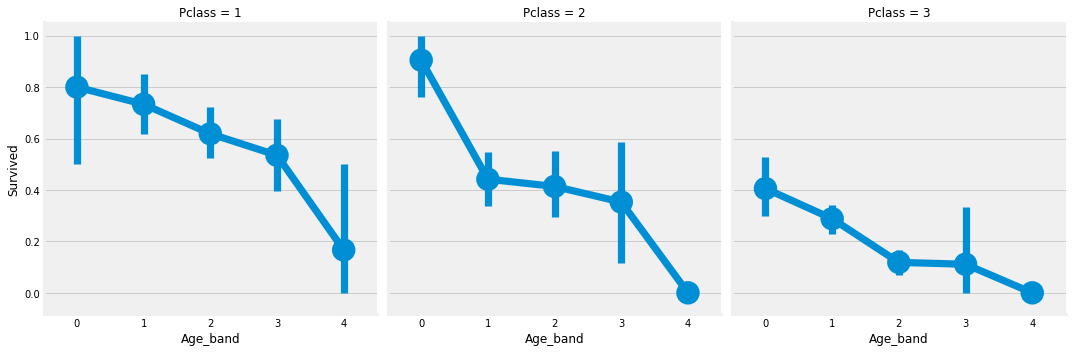

In [15]:
sns.factorplot('Age_band','Survived',data = data, col='Pclass')
plt.show()

Pclass에 관계없이 나이가 많아질수록 생존확률이 떨어지는 것을 볼 수 있다.

### Familiy_Size and Alone

기존에 없던 Family_Size와 Alone이라는 feature를 새롭게 생성하는 것이다. (Parch와 SibSp를 사용)

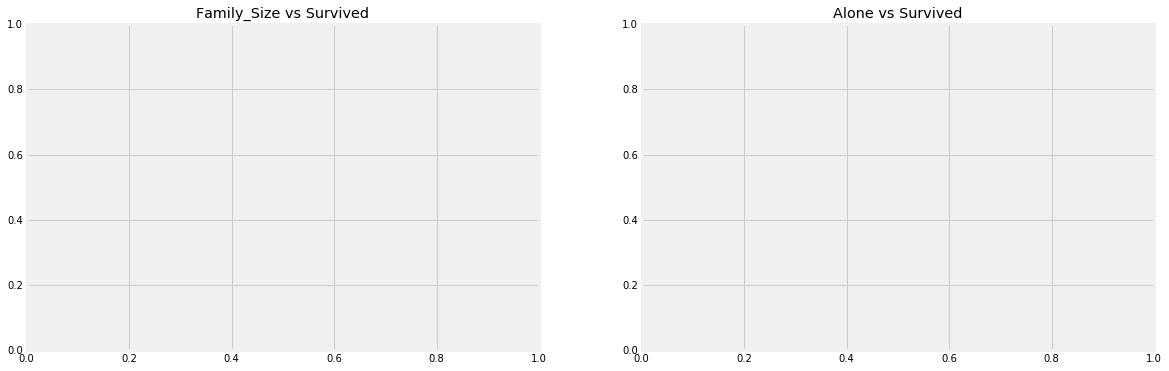

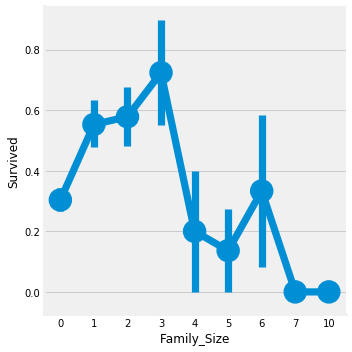

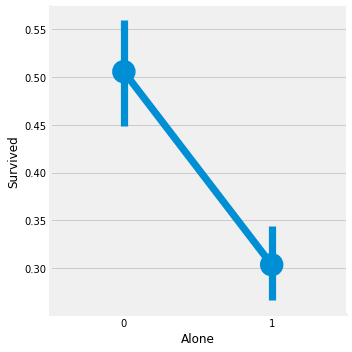

In [21]:
data['Family_Size'] = 0 
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1  #family_size가 0일때, alone열에 1을 부여

f,ax = plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data = data, ax = ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.show()

혼자인 것보다 가족이 있는게 생존확률이 높았다는 것을 확인할 수 있다.

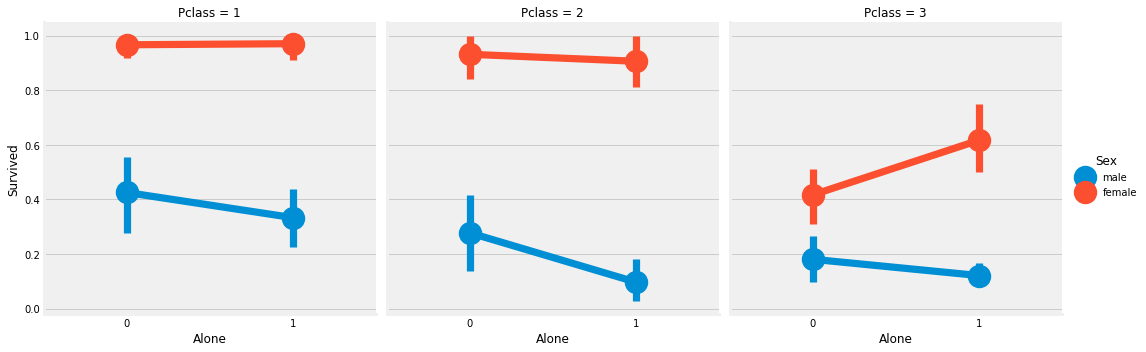

In [22]:
sns.factorplot('Alone','Survived',data=data,hue = 'Sex',col='Pclass')
plt.show()

Pclass 3의 female의 경우를 제외하곤 모두 비슷한 경향을 보여주었다.

### Fare_Range

Fare 역시 연속적인 데이터이므로 Ordinal Value로 바꾸고자 한다. (pandas.qcut을 사용)

pandas.qcut : 동일개수로 데이터를 나누어 groupby로 묶는 함수

In [23]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap = 'summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


높은 요금을 지불 할수록 생존률이 높아진다.

In [24]:
#Fare_Range를 singleton_value로 바꿔준다.
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat'] =1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat'] =2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat'] =3

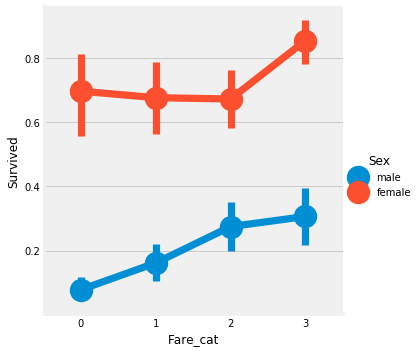

In [25]:
sns.factorplot('Fare_cat','Survived',data=data, hue='Sex')
plt.show()

Fare가 증가 할수록 생존률이 높아짐을 확인할 수 있다. --> 중요한 지표가 될 수 있다.

### convert string_data into Numeric data

Sex, Embarked --> numeric_data

In [27]:
data['Sex'].replace(['male','female'],[0,1],inplace = True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace = True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace = True)

### Dropping UnNeeded Features

Name : 불필요한 값 + categorical value로 바꿀수 없음.

Age : Age_band feature로 대체

Ticket : random string이기 때문에 categorised가 어렵다.

Fare : Fare_cat으로 대체

Cabin : 결측값이 너무 많기 때문에 feature 탈락

Fare_Range : Fare_cat으로 대체

Passengerld : categorised 될 수 없다.

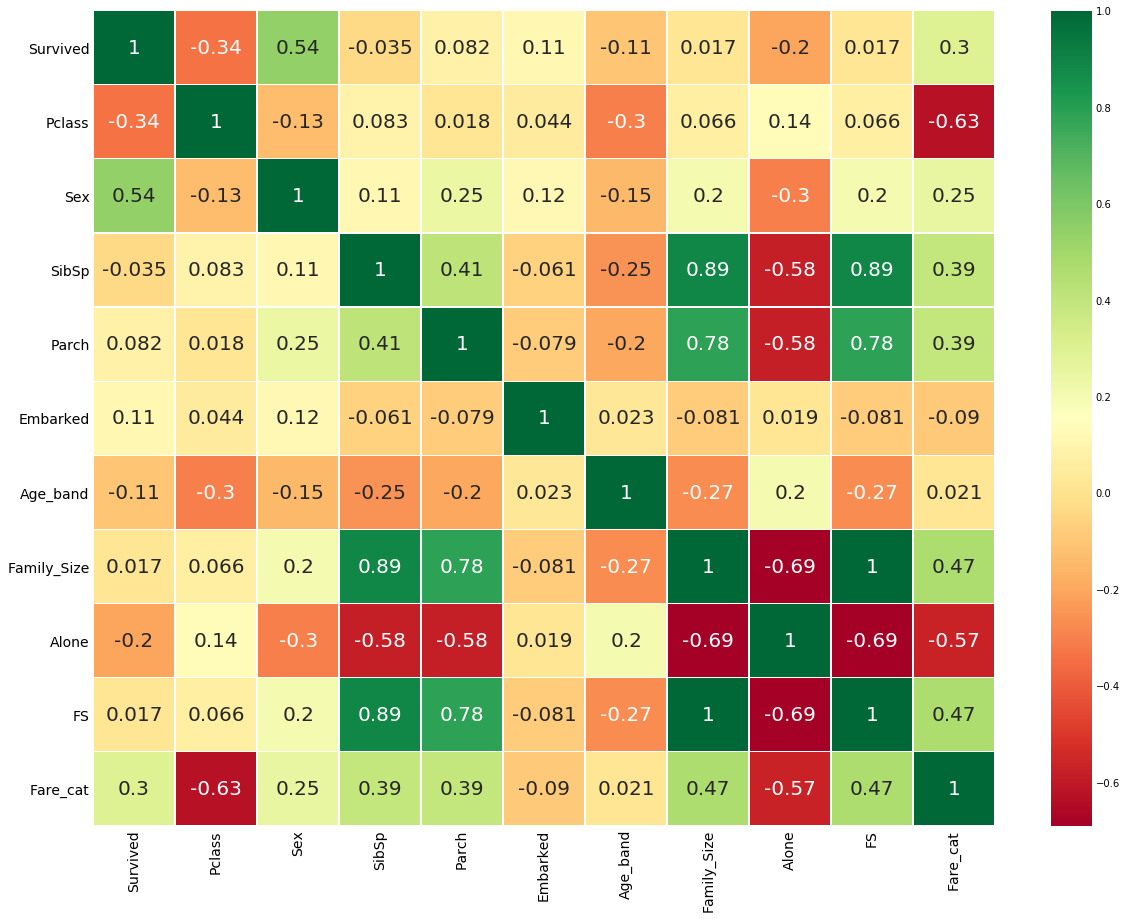

In [28]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

지표간의 상관성을 확인할 수 있다 -> 